#  Data Wrangling - Project Two
## Ashinze Emmanuel Chidi
### Udacity Nanodegree Program

# Introduction

Real-world data rarely comes clean. Using Python and its libraries,I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively to be used in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

## Project Overview
The project is divided into four sections:
<ul>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#analysis">Analysis and Visualization</a></li>

### Importing Required Libraries

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

<a id='gather'></a>
# Section I: Gathering Data

Reading the provided Files
### 1. Twitter Archive Enhanced Data

In [2]:
#using the read_csv function to read the file
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
#Using the info function to know basic properties of the dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Image Predictions Data

In [4]:
#using the read_csv function to read the file
image_df = pd.read_csv('image-predictions.tsv',sep ='\t')


In [5]:
#Using the info function to know basic properties of the dataset
image_df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. API Data

Using the provided Text file containing the tweets and reading it to extract the 
data

In [6]:
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})
    

In [7]:
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [8]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [9]:
twitter_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


<a id='assess'></a>
# Section II: Assessing Data

### 1. Twitter Archive Enhanced Data

In [10]:
tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
tweet_df.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
tweet_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
tweet_df.duplicated().sum()

0

In [15]:
! pip install pandas-profiling

In [16]:
#from pandas_profiling import ProfileReport

In [17]:
#ProfileReport(tweet_df)

####  Quality Issues

1. Too many columns. Columns that are not needed will be dropped.
2. Inconsistent Datatypes across various columns (tweet_id, rating_denominator,rating_numerator, source,timestamp)
3. Errors in the rating_numerator and rating_denominator
4. Missing values in the Dataset and incorrect representation of missing values in the name and URL columns 
5. Errors in Data entries in the dog names column
6. Improper Formattting of the Source Column and Text Column


#### Tidiness Issue
1. The doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column.


### 2.  Image Predictions Data

In [18]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_df.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [21]:
image_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
image_df.duplicated().sum()

0

In [23]:
#ProfileReport(image_df)

#### Quality Issues

1. Missing Images.
2. Inconsistent data types (p1,p2,p3)

#### Tidiness Issues
1. The Columns (p1_conf, p2_conf and p3_conf ) should be merged into one column
2. (p1_dog, p2_dog and p3_dog) should be merged
3. The table should be merged with the twitter archive table


### 3. API Data

In [24]:
twitter_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [25]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [26]:
twitter_data.describe(include='all')

,tweet_id,retweet_count,favorite_count,followers_count
count,2354,2354.000000,2354.000000,2.354000e+03
unique,2354,NaN,NaN,NaN
top,892420643555336193,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,3164.797366,8080.968564,3.200942e+06
std,NaN,5284.770364,11814.771334,4.457302e+01
min,NaN,0.000000,0.000000,3.200799e+06
25%,NaN,624.500000,1415.000000,3.200898e+06
50%,NaN,1473.500000,3603.500000,3.200945e+06
75%,NaN,3652.000000,10122.250000,3.200953e+06


In [27]:
twitter_data.isna().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [28]:
twitter_data.duplicated().sum()

0

In [29]:
#ProfileReport(twitter_data)

####  Quality Issues
1. Missing Tweets
2. Inconsistent data types

#### Tidiness
The dataset should be merged with the Twitter archive Dataset

<a id='clean'></a>
# Section III: Clean Data

Having recognised the issues with the data, the next thing is to clean the data.

In [30]:
#create a copy of the data to keep its integrity
tweet_archive = tweet_df.copy()
image_clean = image_df.copy()
api_clean = twitter_data.copy()

In [31]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [32]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [34]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Quality Issues

Define

~~~~Too many columns. Columns that are not needed will be dropped.

Code

In [35]:
#drop columns using pandas
tweet_archive = tweet_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

C:\Users\ashin\AppData\Local\Temp/ipykernel_10844/3910607560.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tweet_archive = tweet_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)


Test

In [36]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


Define

Inconsistent Datatypes across various columns (tweet_id, rating_denominator,rating_numerator, source,timestamp)

Code

In [37]:
#convert tweet id to str
tweet_archive.tweet_id = tweet_archive.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
api_clean.tweet_id = api_clean.tweet_id.astype(str)

# convert timestamp to datetime
tweet_archive.timestamp = pd.to_datetime(tweet_archive.timestamp)

# convert source to category datatype
tweet_archive.source = tweet_archive.source.astype("category")

tweet_archive.rating_numerator = tweet_archive.rating_numerator.astype(float)
tweet_archive.rating_denominator = tweet_archive.rating_denominator.astype(float)

Test

In [38]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   category           
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   float64            
 5   rating_denominator  2356 non-null   float64            
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 186.7+ KB


Define

 Errors in the rating_numerator and rating_denominator 
 There are some entries here with decimals that needs to be fixed and some are not ratings.

Code

In [39]:
ratings_fix = tweet_archive[tweet_archive.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text
for i in ratings_fix:
    mask = tweet_archive.text == i
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    tweet_archive.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    tweet_archive.loc[mask, column_name2] = 10

C:\Users\ashin\AppData\Local\Temp/ipykernel_10844/4244232514.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ratings_fix = tweet_archive[tweet_archive.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text


In [40]:
tweet_archive[tweet_archive.text.isin(ratings_fix)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,13,10.0,None,None,None,None,None
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,13,10.0,None,None,None,None,None
561,802624713319034886,2016-11-26 21:26:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",11,10.0,None,None,None,None,None
766,777684233540206592,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",11,10.0,None,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",14,10.0,None,None,None,None,None
860,763167063695355904,2016-08-10 00:16:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,11,10.0,Eve,None,None,pupper,None
1007,747600769478692864,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,7,10.0,Bookstore,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",14,10.0,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,13,10.0,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,11,10.0,Bluebert,None,None,None,None


In [41]:
# we use regexes to first get the affected entries
tweet_archive[tweet_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

C:\Users\ashin\AppData\Local\Temp/ipykernel_10844/906203730.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tweet_archive[tweet_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5.0,10.0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he...,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26.0,10.0


In [42]:

#update values
tweet_archive.loc[(tweet_archive.tweet_id == '883482846933004288')& (tweet_archive.rating_numerator == 5.0),['tweet_id','rating_numerator']] = 13.5
tweet_archive.loc[(tweet_archive.tweet_id == '832215909146226688'), 'rating_numerator'] = 9.75
tweet_archive.loc[(tweet_archive.tweet_id == '786709082849828864'), 'rating_numerator'] = 9.75
tweet_archive.loc[(tweet_archive.tweet_id == '778027034220126208'), 'rating_numerator'] =11.27
tweet_archive.loc[(tweet_archive.tweet_id == '681340665377193984'), 'rating_numerator'] = 9.5
tweet_archive.loc[(tweet_archive.tweet_id == '680494726643068929'), 'rating_numerator'] = 11.26

Test

In [43]:
tweet_archive[tweet_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


C:\Users\ashin\AppData\Local\Temp/ipykernel_10844/1261710204.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tweet_archive[tweet_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,13.5,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,13.5,10.0,Bella,None,None,None,None
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",9.75,10.0,Logan,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",9.75,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0,Sophie,None,None,pupper,None
1689,681340665377193984,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,9.5,10.0,None,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,11.26,10.0,None,None,None,None,None


Define


Incorrect Dog names

Code

In [44]:
tweet_archive['name'][tweet_archive['name'].str.match('[a-z]+')] = 'None'

C:\Users\ashin\AppData\Local\Temp/ipykernel_10844/3292046587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_archive['name'][tweet_archive['name'].str.match('[a-z]+')] = 'None'


Test

In [45]:
tweet_archive['name'].value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

## Tidiness Issue

Define

Some records having multiple dog stages

Code

In [46]:
tweet_archive['all_stages'] = tweet_archive.doggo + tweet_archive.floofer + tweet_archive.pupper + tweet_archive.puppo

In [47]:
def check_stages(archive):
    if archive['all_stages'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['all_stages'].count('doggo') == 1:
            return 'Doggo'
        elif archive['all_stages'].count('floofer') == 1:
            return 'Floofer'
        elif archive['all_stages'].count('pupper') == 1:
            return 'Pupper'
        elif archive['all_stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

tweet_archive['dog_stage'] = tweet_archive.apply(check_stages, axis=1)

Test

In [48]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   category           
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   object             
 5   rating_denominator  2356 non-null   float64            
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
 11  all_stages          2356 non-null   object             
 12  dog_stage           2356 non-null 

Define

Drop other columns that are not needed

Code

In [49]:
tweet_archive.drop(['doggo', 'floofer', 'pupper', 'puppo', 'all_stages'], axis=1, inplace=True)

In [50]:
tweet_archive.dog_stage = tweet_archive.dog_stage.astype('category')

Test

In [51]:
tweet_archive.dog_stage.value_counts()

None        1976
Pupper       245
Doggo         83
Puppo         29
Multiple      14
Floofer        9
Name: dog_stage, dtype: int64

Define

Improper Formattting of the Source Column and Text Column

Code

In [52]:
#extract values
tweet_archive.source = tweet_archive.source.str.extract('>([\w\W\s]*)<', expand=True)

In [53]:
def htmlink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
tweet_archive.text = tweet_archive.text.apply(htmlink)

Test

In [54]:
#confirm changes
tweet_archive.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [55]:
for row in tweet_archive.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


## Tidiness

Define

Merge the three Tables

Code

In [56]:
tweet_archive = pd.merge(left=tweet_archive, right=api_clean, how='left', on='tweet_id')
tweet_archive = pd.merge(left=tweet_archive, right=image_clean, how='left', on='tweet_id')

In [57]:

tweet_archive.dropna(axis = 0, inplace=True)

In [58]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2072 non-null   object             
 1   timestamp           2072 non-null   datetime64[ns, UTC]
 2   source              2072 non-null   object             
 3   text                2072 non-null   object             
 4   rating_numerator    2072 non-null   object             
 5   rating_denominator  2072 non-null   float64            
 6   name                2072 non-null   object             
 7   dog_stage           2072 non-null   category           
 8   retweet_count       2072 non-null   float64            
 9   favorite_count      2072 non-null   float64            
 10  followers_count     2072 non-null   float64            
 11  jpg_url             2072 non-null   object             
 12  img_num             2072 non-null 

# Save Cleaned Data

In [59]:
tweet_archive.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
# Section IV: Analysis ans Visualization

In [60]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [61]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2072 non-null   int64  
 1   timestamp           2072 non-null   object 
 2   source              2072 non-null   object 
 3   text                2072 non-null   object 
 4   rating_numerator    2072 non-null   float64
 5   rating_denominator  2072 non-null   float64
 6   name                2072 non-null   object 
 7   dog_stage           2072 non-null   object 
 8   retweet_count       2072 non-null   float64
 9   favorite_count      2072 non-null   float64
 10  followers_count     2072 non-null   float64
 11  jpg_url             2072 non-null   object 
 12  img_num             2072 non-null   float64
 13  p1                  2072 non-null   object 
 14  p1_conf             2072 non-null   float64
 15  p1_dog              2072 non-null   bool   
 16  p2    

In [62]:
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype("category")
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']] = twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']].astype(int)
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

## Analysis and Visualizations Area
1. What source tends to have the most tweets?
2. Is there any difference in the proportion of the dog stages?
3.How does retweet count vary with favorite count?


Q1. What source tends to have the most tweets?

In [63]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    2031
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

No handles with labels found to put in legend.


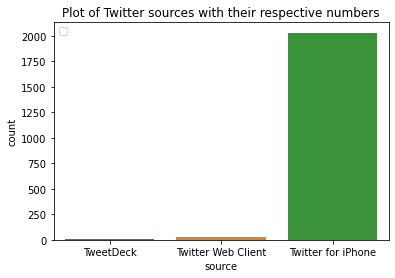

In [64]:
sns.countplot(x='source',data = twitter_archive_master)
plt.title('Plot of Twitter sources with their respective numbers')
plt.legend()

It can be seen from the graph above that iPhone users tend to have the most tweets

Q2. Is there any difference in the proportion of the dog stages?

In [65]:
twitter_archive_master.dog_stage.value_counts()

None        1752
Pupper       210
Doggo         67
Puppo         23
Multiple      13
Floofer        7
Name: dog_stage, dtype: int64

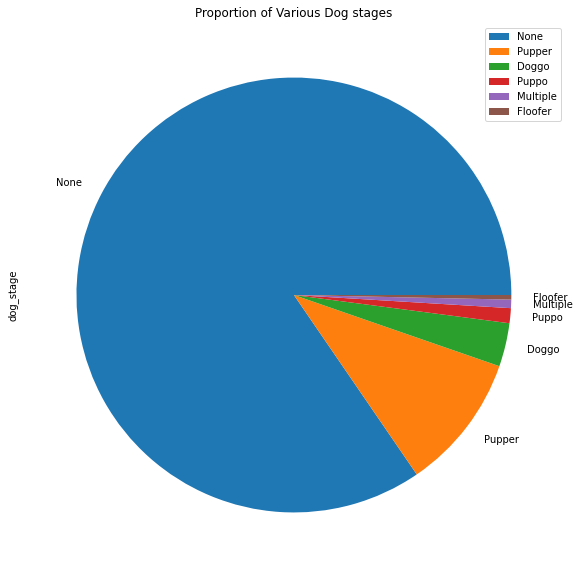

In [66]:
twitter_archive_master.dog_stage.value_counts().plot(kind='pie',figsize=(10,10))
plt.title('Proportion of Various Dog stages')
plt.legend()

As seen from the pie chart, the None category has the higest number, followed by pupper and floofer having the least.

Q3. How does retweet count vary with favorite count?

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

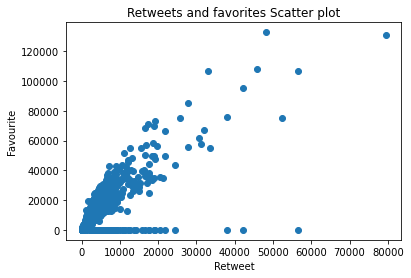

In [67]:
plt.scatter(twitter_archive_master['retweet_count'],twitter_archive_master['favorite_count'])
plt.xlabel('Retweet')
plt.ylabel('Favourite')
plt.title('Retweets and favorites Scatter plot')

In [68]:
twitter_archive_master.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.197624,0.012981,0.010330,-0.019924,0.000254,-0.008358,-0.029762,-0.021539,-0.033211,-0.006685,-0.029807
rating_denominator,0.197624,1.000000,-0.021247,-0.025542,0.006092,-0.003272,-0.000918,-0.000612,-0.040016,-0.002230,-0.005299,0.003364
retweet_count,0.012981,-0.021247,1.000000,0.790556,-0.365837,0.105850,0.043867,0.005674,-0.007904,0.016796,-0.034774,0.005704
favorite_count,0.010330,-0.025542,0.790556,1.000000,-0.502859,0.133121,0.074322,0.055386,-0.021291,0.059378,-0.051921,0.043090
followers_count,-0.019924,0.006092,-0.365837,-0.502859,1.000000,-0.209404,-0.078074,-0.118951,-0.014219,-0.118528,0.028977,-0.096077
img_num,0.000254,-0.003272,0.105850,0.133121,-0.209404,1.000000,0.203383,0.026167,-0.159912,0.045760,-0.139686,0.059680
p1_conf,-0.008358,-0.000918,0.043867,0.074322,-0.078074,0.203383,1.000000,0.118466,-0.511248,0.131673,-0.709396,0.108692
p1_dog,-0.029762,-0.000612,0.005674,0.055386,-0.118951,0.026167,0.118466,1.000000,0.112476,0.634600,0.049137,0.555699
p2_conf,-0.021539,-0.040016,-0.007904,-0.021291,-0.014219,-0.159912,-0.511248,0.112476,1.000000,0.100780,0.478678,0.067714
p2_dog,-0.033211,-0.002230,0.016796,0.059378,-0.118528,0.045760,0.131673,0.634600,0.100780,1.000000,0.043185,0.550088


Retweet count vary with favorite count very strongly, with a correlation of about 0.8.